In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import json
from scipy import stats
from typing import Dict, List, Tuple
from collections import Counter
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class Preprocessing:
  def __init__(self, path):
    #Initialising data path
    self.path = path
    self.df = self._load_data()

  def _load_data(self):
    #Converting json data to dataframe
    data = []
    response = requests.get(self.path)
    for i in response.text.splitlines():
        data.append(json.loads(i))
    df = pd.DataFrame(data)
    return df

  def check_null_values(self):
    # Check if any null values exist
     if self.df.isnull().any().any():
        self.df.dropna(inplace=True)
     return self.df

  def numerical_distributions(self):
    #For extracting distributions of SQL lengths, Question lengths
    self.df['question_length'] = self.df['question'].str.len()
    self.df['sql_length'] = self.df['sql'].str.len()
    distributions = {
        'question_length' : {
        'mean': self.df['question_length'].mean(),
        'median': self.df['question_length'].median(),
        'min': self.df['question_length'].min(),
        'max': self.df['question_length'].max(),
        'std': self.df['question_length'].std()
        },
        'sql_length' : {
             'mean': self.df['sql_length'].mean(),
        'median': self.df['sql_length'].median(),
        'min': self.df['sql_length'].min(),
        'max': self.df['sql_length'].max(),
        'std': self.df['sql_length'].std()
    }}
    self._plot_distributions()
    return distributions

  def _plot_distributions(self):
  #plots the distributions
     plt.figure(figsize=(5,5))
     sns.histplot(self.df['question_length'])
     plt.title('Length of "questions" feature')
     plt.xlabel('Question length in terms of characters')
     plt.ylabel('Count')
     plt.show()


     plt.figure(figsize=(5,5))
     sns.histplot(self.df['sql_length'])
     plt.title('Length of "sql" feature')
     plt.xlabel('SQL length in terms of characters')
     plt.ylabel('Count')
     plt.show()

     sns.scatterplot(data=self.df, x='question_length', y='sql_length')
     plt.title('Question Length vs SQL Length')
     plt.xlabel('Question Length')
     plt.ylabel('SQL Length')
     plt.tight_layout()
     plt.savefig('distributions.png')

  def categorical_distributions(self):
   #For extracting categorical distributions
    categories = lambda q:(
        'player-centric' if 'player' in q.lower() else
        'team-centric' if 'team' in q.lower() else
        'game-centric' if 'game' in q.lower() else 'other'
    )
    self.df['question_category'] = self.df['question'].apply(categories)

    categorical_distributions = {
        'question_category': self.df['question_category'].value_counts().to_dict()
    }
    self._plot_categorical_data()
    return categorical_distributions

  def _plot_categorical_data(self):
    plt.figure(figsize=(5,5))
    sns.countplot(x='question_category', data=self.df)
    plt.title('Distribution of Question Categories')
    plt.xticks(rotation=45)




In [ ]:
def main():
  Basketballpreprocessor = Preprocessing("https://raw.githubusercontent.com/AkshaySyal/End-to-End-Basketball-QA-RAG-Capstone/refs/heads/main/data/train%20data/generated_queries_large_filtered.jsonl")
  initial_size = len(Basketballpreprocessor.df)
  print(f"Initial size of the dataset is:{initial_size}")
  cleaned_df = Basketballpreprocessor.check_null_values()
  final_size = len(cleaned_df)
  print(f"Final size of the dataset is:{final_size}")


  #numerical distributions
  numerical_stats = Basketballpreprocessor.numerical_distributions()
  print("The following are the numerical distributions:")
  for feature, stats in numerical_stats.items():
    print(f"\n{feature.replace('_', ' ').title()}:")
    for stat, value in stats.items():
      print(f"- {stat}: {value:.2f}")


  #categorical distributions
  categorical_stats = Basketballpreprocessor.categorical_distributions()
  print("The following are the categorical distributions:")
  for category, count in categorical_stats['question_category'].items():
    print(f"- {category}: {count}")





Initial size of the dataset is:313
Final size of the dataset is:313


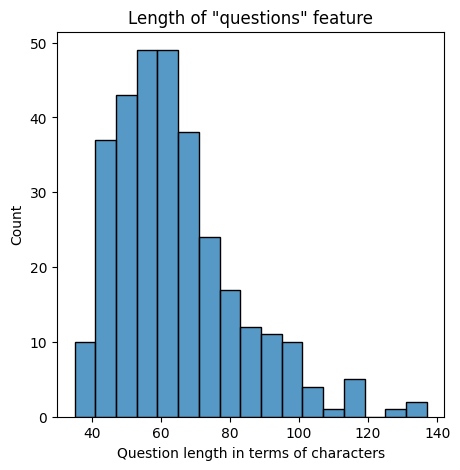

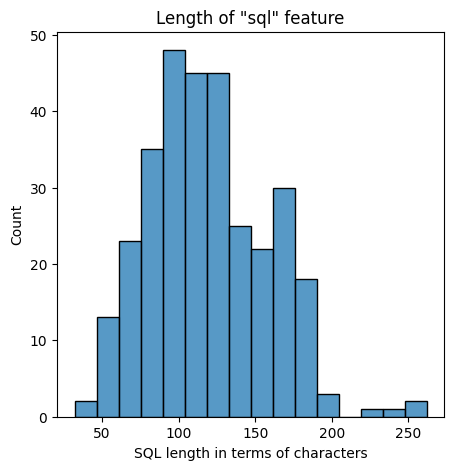

The following are the numerical distributions:

Question Length:
- mean: 63.90
- median: 61.00
- min: 35.00
- max: 137.00
- std: 18.11

Sql Length:
- mean: 118.74
- median: 116.00
- min: 32.00
- max: 262.00
- std: 39.29
The following are the categorical distributions:
- player-centric: 247
- other: 38
- team-centric: 28


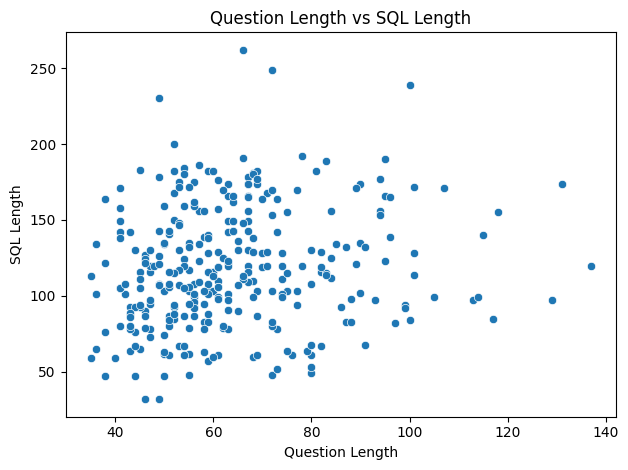

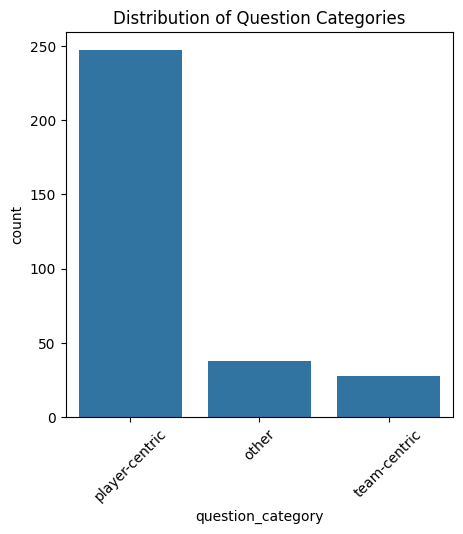

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
# Need to do
# 1. Clean QA Dataset
# 2. Clean common_table_info
# 3. Upload common_player_info to cloud (done)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sqlite3
engine = sqlite3.connect("/content/drive/MyDrive/SQLite Tables/nba_roster.db")

In [ ]:
# Cleaning common_table_info
# Need to fetch it from Kaggle

In [5]:
# Trying a query
query="""SELECT *
FROM nba_roster
;"""
df = pd.read_sql(query, con=engine)
print(df)

                   Team               NAME Jersey POS AGE      HT       WT  \
0         Atlanta Hawks         Saddiq Bey     41  SF  24   6' 7"  215 lbs   
1         Atlanta Hawks  Bogdan Bogdanovic     13  SG  31   6' 5"  225 lbs   
2         Atlanta Hawks        Kobe Bufkin     NA   G  20   6' 4"  195 lbs   
3         Atlanta Hawks       Clint Capela     15   C  29  6' 10"  256 lbs   
4         Atlanta Hawks     Bruno Fernando      0  PF  25  6' 10"  240 lbs   
..                  ...                ...    ...  ..  ..     ...      ...   
595  Washington Wizards       Jordan Poole      3  SG  24   6' 4"  194 lbs   
596  Washington Wizards       Ryan Rollins      2   G  21   6' 3"  180 lbs   
597  Washington Wizards      Landry Shamet     NA  SG  26   6' 4"  190 lbs   
598  Washington Wizards   Tristan Vukcevic     NA  PF  20   7' 0"  225 lbs   
599  Washington Wizards       Delon Wright     55  SG  31   6' 5"  185 lbs   

           COLLEGE       SALARY  
0        Villanova   $4,556,9